# Derivative of Radiation modes in Z

For the space wave asymptotics, we need the derivatives of the modes as $Z$ changes.  Here we work on implementing this (with finite differences).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from slab import SlabExact
%matplotlib widget
plt.style.use('dark_background')

In [2]:
max_loss_wl = 6.90764472e-06
A = SlabExact(scale=1e-5, Ts=[5, 1, 8, 1, 5],
              ns=[1, 1.44, 1, 1.44, 1], xrefs=[500, 300, 300, 300, 500],
              symmetric=True, wl=max_loss_wl)

## Simple estimates

In [19]:
Z0 = 1e-11
dZ = 1e-13
F0 = A.fields_Z(Z0, mode_type='radiation')
dF = A.fields_Z(Z0 + dZ, mode_type='radiation')


In [20]:
dFdZ = lambda x, z=0: (dF(x, zs=z) - F0(x, zs=z)) / dZ
DFdZ = lambda x, z: (dF(x, z) - F0(x, z)) / dZ

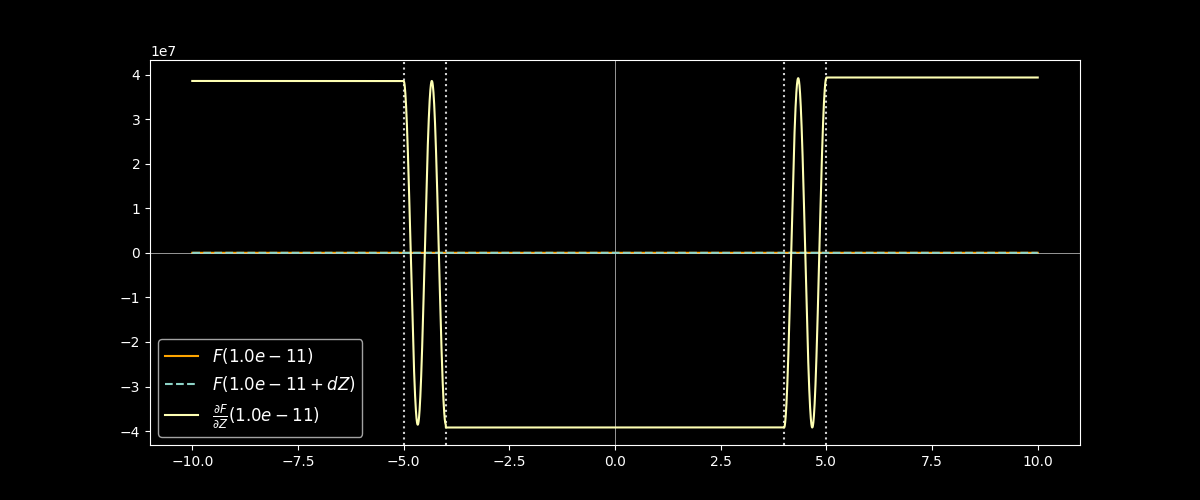

In [21]:
A.plot_field_1d(F0, label='$F(%.1e)$'%Z0, color='orange')
A.add_1d_plot(dF, label='$F(%.1e + dZ)$'%Z0, linestyle='--')
A.add_1d_plot(dFdZ, label='$\\frac{\partial F}{\partial Z}(%.1e)$'%Z0)

In [22]:
Fp = A.dFdZ_approx(Z_base=1e-11, dZ=1e-13, order=2)

(<Figure size 1200x500 with 1 Axes>, <Axes: >)

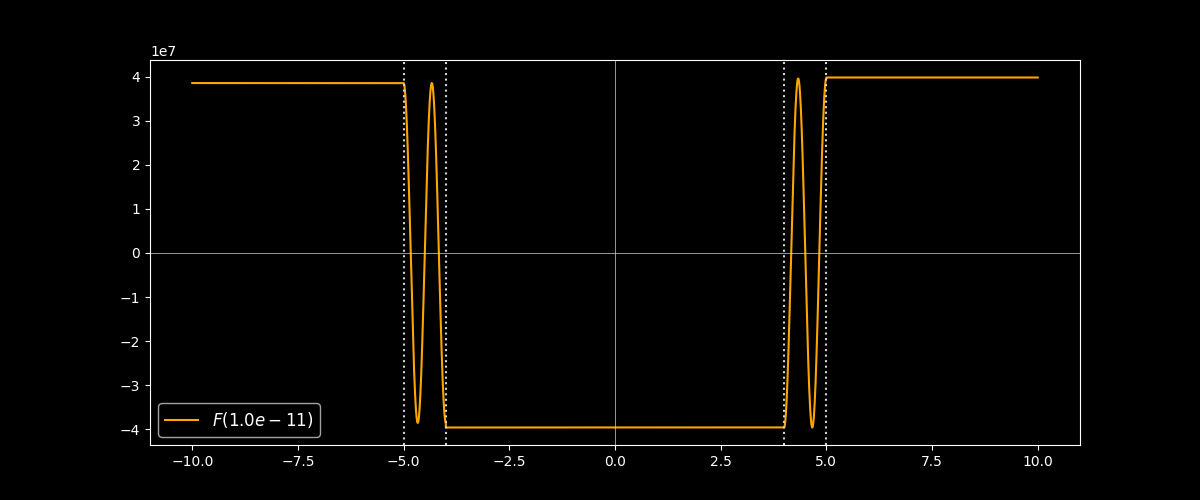

In [23]:
A.plot_field_1d(Fp, label='$F(%.1e)$'%Z0, color='orange')


In [24]:
B = SlabExact(scale=1e-5, Ts=[5, 1, 8, 1, 5],
              ns=[1, 1.44, 1, 1.44, 1], xrefs=[500, 300, 300, 300, 500],
              symmetric=True, wl=1e-6)

In [60]:
Z0 = 1e-5
dZ = 1e-10
FpB = B.dFdZ_approx(Z_base=Z0, dZ=dZ, order=1)

(<Figure size 1200x500 with 1 Axes>, <Axes: >)

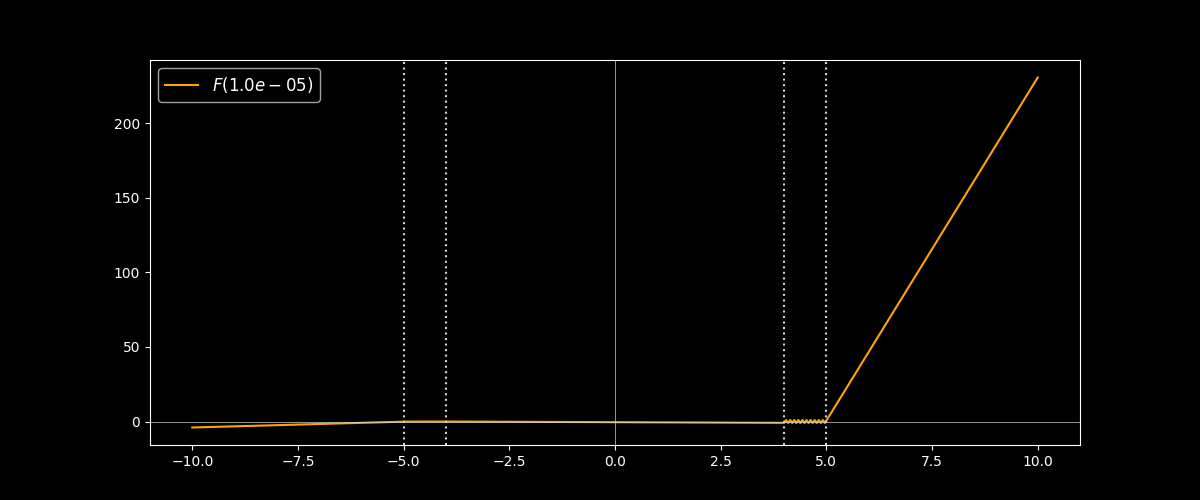

In [61]:
B.plot_field_1d(FpB, label='$F(%.1e)$'%Z0, color='orange')


interactive(children=(FloatSlider(value=1e-06, description='Z', layout=Layout(width='90%'), max=0.001, min=1e-…

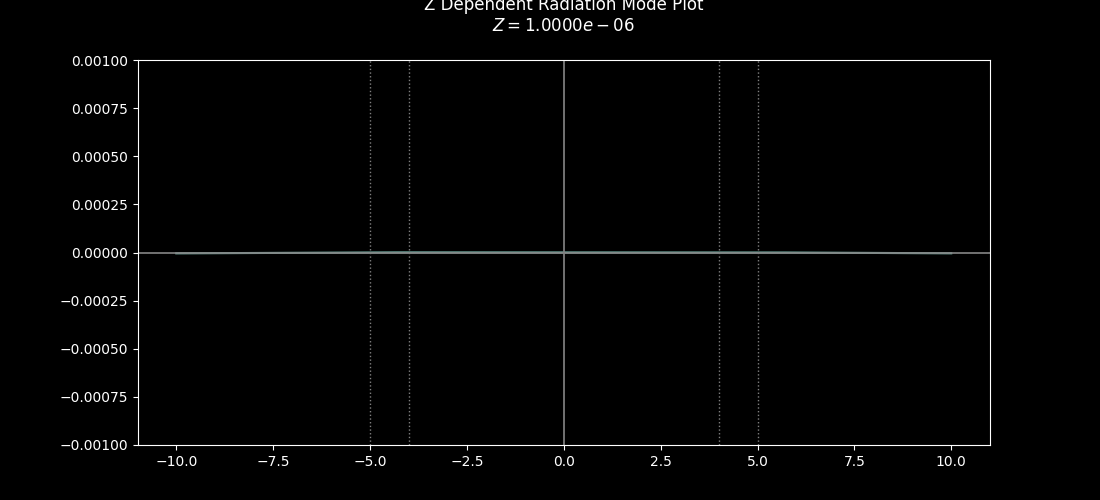

In [67]:
B.interactive_radiation_mode_plot(minZ=1e-6, maxZ=.001, ylims=(-.001, .001))